In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits_data=load_digits()

In [3]:
digits_data.keys()

dict_keys(['images', 'target', 'target_names', 'data', 'DESCR'])

In [4]:
data=pd.DataFrame(digits_data["data"])

In [5]:
labels=pd.Series(digits_data["target"])

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


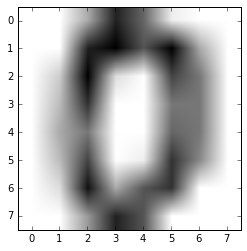

In [7]:
firsti=data.iloc[0]
np_first=firsti.values
np_first=np_first.reshape(8,8)
plt.imshow(np_first,cmap='gray_r')

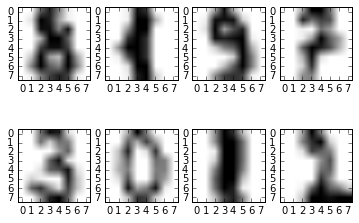

In [8]:
f, axarr=plt.subplots(2,4)
for j in range(0,4):
    axarr[0,j].imshow(data.iloc[(100*j)-1].values.reshape(8,8),cmap="gray_r")
for k in range(0,4):
    axarr[1,k].imshow(data.iloc[1000+(k*100)-1].values.reshape(8,8),cmap="gray_r")

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [10]:
last_train_row=int(data.shape[0]*0.8)
train=data[:last_train_row]
test=data[last_train_row:]
print(train.head())
test.head()

    0    1    2     3     4     5    6    7    8    9  ...    54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0 ...   5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0 ...   9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1437,0.0,4.0,16.0,15.0,2.0,0.0,0.0,0.0,0.0,11.0,...,15.0,0.0,0.0,4.0,16.0,16.0,16.0,12.0,11.0,0.0
1438,0.0,1.0,12.0,15.0,5.0,0.0,0.0,0.0,0.0,4.0,...,4.0,0.0,0.0,2.0,12.0,16.0,13.0,6.0,0.0,0.0
1439,0.0,0.0,0.0,12.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,9.0,0.0,0.0,0.0
1440,0.0,2.0,6.0,10.0,12.0,1.0,0.0,0.0,0.0,14.0,...,10.0,0.0,0.0,0.0,5.0,16.0,16.0,14.0,1.0,0.0
1441,0.0,0.0,6.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,5.0,13.0,16.0,12.0,1.0,0.0


In [11]:
def train(ne,train_f,train_l):
    knn=KNeighborsClassifier(ne)
    knn.fit(train_f,train_l)
    return knn

In [12]:
def test(model,test_f,test_l):
    predictions=model.predict(test_f)
    accuracy=accuracy_score(test_l,predictions)
    return accuracy

In [13]:
def cross_validate(k):
    f_accs=[]
    kf=KFold(n_splits=4,random_state=1)
    for train_index,test_index in kf.split(data):
        train_features,test_features=data.loc[train_index],data.loc[test_index]
        train_labels,test_labels=labels.loc[train_index],labels.loc[test_index]
        model=train(k,train_features,train_labels)
        acc=test(model,test_features,test_labels)
        f_accs.append(acc)
    return f_accs


In [14]:
k_one=cross_validate(1)
k_one_mean=np.mean(k_one)
k_one_mean

0.9677233358079684

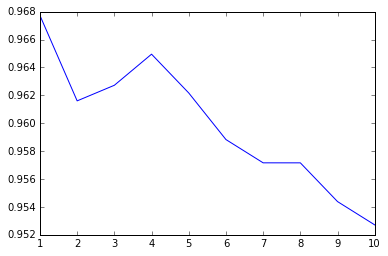

In [15]:
x=list(range(1,11))
diff_k_accs=[]
for i in x:
    f_accs=cross_validate(i)
    f_accs_mean=np.mean(f_accs)
    diff_k_accs.append(f_accs_mean)
plt.plot(x,diff_k_accs)
plt.show()

In [16]:
def train_nn(neuron_arch,tr_f,tr_l):
    nn=MLPClassifier(hidden_layer_sizes=neuron_arch)
    nn.fit(tr_f,tr_l)
    return nn

In [17]:
def test_nn(model,te_f,te_l):
    predictions=model.predict(te_f)
    acc=accuracy_score(te_l,predictions)
    return acc

In [18]:
def cv_nn(neuron_arch):
    f_accs=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data):
        train_features,test_features=data.loc[train_index],data.loc[test_index]
        train_labels,test_labels=labels.loc[train_index],labels.loc[test_index]
        model=train_nn(neuron_arch,train_features,train_labels)
        acc=test(model,test_features,test_labels)
        f_accs.append(acc)
    return f_accs

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



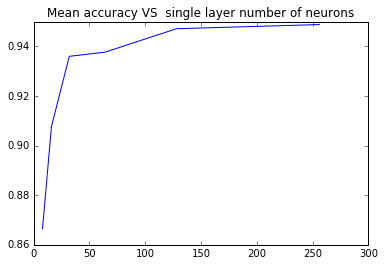

In [19]:
neuron_arch=[(8,),
             (16,),
             (32,),
             (64,),
             (128,),
             (256,)]
diff_n_accs=[]
for i in neuron_arch:
    f_accs=cv_nn(i)
    f_accs_mean=np.mean(f_accs)
    diff_n_accs.append(f_accs_mean)
x=[i[0] for i in neuron_arch]
plt.plot(x,diff_n_accs)
plt.title("Mean accuracy VS  single layer number of neurons")
plt.show()

In [21]:
neuron_arch=[(64,64),
             (128,128),
             (256,256)]
diff_n_two_acc=[]
for i in neuron_arch:
    f_accs=cv_nn(i)
    f_accs_mean=np.mean(f_accs)
    diff_n_two_accs.append(f_accs_mean)
x=[i[0] for i in neuron_arch]
plt.plot(x,diff_n_two_acc)
plt.title("Mean accuracy VS two layers number of neurons")

NameError: name 'diff_n_two_accs' is not defined

In [ ]:
def cv_nn(neuron_arch):
    f_accs=[]
    kf=KFold(n_splits=6,random_state=2)
    for train_index,test_index in kf.split(data):
        train_features,test_features=data.loc[train_index],data.loc[test_index]
        train_labels,test_labels=labels.loc[train_index],labels.loc[test_index]
        model=train_nn(neuron_arch,train_features,train_labels)
        acc=test(model,test_features,test_labels)
        f_accs.append(acc)
    return f_accs

In [ ]:
neuron_arch=[(10,10,10),
             (64,64,64),
             (128,128,128)]
diff_n_three_accs=[]
for i in neuron_arch:
    f_accs=cv_nn(i)
    f_accs_mean=np.mean(f_accs)
    diff_n_three_accs.append(f_accs_mean)
x=[i[0] for i in neuron_arch]
plt.plot(x,diff_n_three_accs)
plt.title("Mean accuracy VS three layers number of neurons")